<a href="https://colab.research.google.com/github/Gaskell-1206/MSI_vs_MSS_Classification/blob/Dev/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import random
import itertools

In [ ]:
def plot_auroc_curve(y_true,prob,model,ax):
    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()
    fpr[model], tpr[model], thresholds[model] = roc_curve(y_true, prob)
    roc_auc[model] = auc(fpr[model], tpr[model])

    # plt.figure()
    lw = 2
    ax.plot(
        fpr[model],
        tpr[model],
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc[model],
    )

    ax.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--", label=model)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver operating characteristic Curve")
    ax.legend(loc="lower right")
    plt.show()


In [ ]:
def cm(y_true, y_pred, name):
    cnf_matrix = confusion_matrix(y_true, y_pred,normalize='true')
    np.set_printoptions(precision=2)
    plt.figure()
    class_names = ['MSS','MSI']
    plt.imshow(cnf_matrix, interpolation='nearest', cmap = plt.cm.Blues)
    plt.colorbar()
    plt.title(name, fontsize = 16)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    fmt = '%'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
      plt.text(j, i, "%0.2f" % cnf_matrix[i, j],
               horizontalalignment="center",
               color="white" if cnf_matrix[i, j] > thresh else "black", fontsize = 16)
      plt.tight_layout()
      plt.ylabel('True label', fontsize = 16)
      plt.xlabel('Predicted label', fontsize = 16)

In [ ]:
def plot_results(model_info_s,if_confusion_matrix=False,plot_auroc_curve=False):
    fig, ax = plt.subplots()
    for model_info in model_info_s:
      model_folder, model_type, model_name, bs, lr, w, k = model_info
      # print(model_name)
      if model_type == 'tiles_level':
        test_csv = os.path.join(model_folder, model_type, f'{model_name}_bs{bs}_lr{lr}',f'Tiles_level_Test_{model_name}_bs{bs}_lr{lr}_output.csv')
        cm_title = f"{model_name} CNN"
      elif model_type == 'MIL':
        test_csv = os.path.join(model_folder, model_type, f'MIL_{model_name}_bs{bs}_lr{lr}_w{w}_k{k}_output',f'Test_MIL_{model_name}_bs{bs}_lr{lr}_w{w}_k{k}_output.csv')
        cm_title = f"{model_name}_w{w}_k{k} CNN + MIL"
      elif model_type == 'RNN_tiles_level':
        test_csv = os.path.join(model_folder, model_type, f'RNN_tiles_level_{model_name}_bs{bs}_lr{lr}_w{w}_k{k}_output',f'RNN_tiles_level_{model_name}_bs{bs}_lr{lr}_w{w}_k{k}_output.csv')
        cm_title = f"{model_name}_w{w}_k{k} RNN tiles_level"
      elif model_type == 'RNN_MIL':
        test_csv = os.path.join(model_folder, model_type, f'RNN_{model_name}_bs{bs}_lr{lr}_w{w}_k{k}_output',f'RNN_{model_name}_bs{bs}_lr{lr}_w{w}_k{k}_output.csv')
        cm_title = f"{model_name}_w{w}_k{k} RNN MIL"
      else:
        print("Not found type")

      df = pd.read_csv(test_csv)
      y_true = list(df['target'].ravel())
      y_pred = list(df['prediction'].ravel())
      prob = list(df['probability'].ravel())

      if if_confusion_matrix:
      # confusion matrix
        cm(y_true, y_pred, cm_title)
        # confusion_matrix_resutls = confusion_matrix(y_true, y_pred)
        # plt.figure()
        # plot_confusion_matrix(confusion_matrix_resutls, figsize=(8,8), cmap='Blues',show_absolute=True, show_normed=True)


      # auroc
      if plot_auroc_curve:
        fpr = dict()
        tpr = dict()
        thresholds = dict()
        roc_auc = dict()
        fpr[model_name], tpr[model_name], thresholds[model_name] = roc_curve(y_true, prob)
        roc_auc[model_name] = auc(fpr[model_name], tpr[model_name])

        # plt.figure()
        lw = 2
        ax.plot(
            fpr[model_name],
            tpr[model_name],
            lw=lw,
            label=f"{model_name} (area = %0.2f)" % roc_auc[model_name],
        )
    lw = 2
    ax.plot([0, 1], [0, 1], lw=lw, linestyle="--", label='Random Classifier')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver Operating Characteristic Curve")
    ax.legend(loc="lower right")
    plt.show()

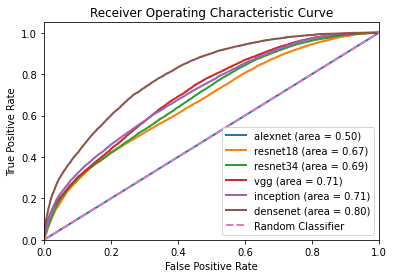

In [ ]:
model_dir = '/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/'
bs = 64
lr = 1e-3
w = 0
k = 0
model_info_s = [
                (model_dir,'tiles_level','alexnet',bs,lr,w,k),
                (model_dir,'tiles_level','resnet18',bs,lr,w,k),
                (model_dir,'tiles_level','resnet34',bs,lr,w,k),
                (model_dir,'tiles_level','vgg',bs,lr,w,k),
                (model_dir,'tiles_level','inception',bs,lr,w,k),
                (model_dir,'tiles_level','densenet',bs,lr,w,k),
]

plot_results(model_info_s,plot_confusion_matrix=False,plot_auroc_curve=True)

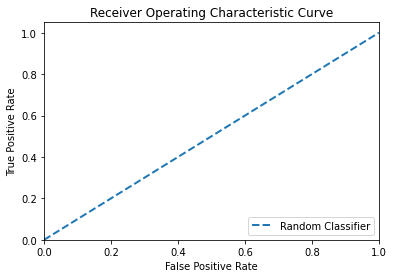

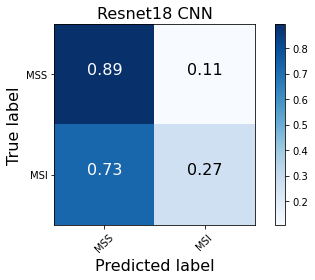

In [ ]:
model_dir = '/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/'
bs = 64
lr = 1e-4
w = 0
k = 0
model_info_s = [(model_dir,'tiles_level','resnet18',bs,lr,w,k)]

plot_results(model_info_s,if_confusion_matrix=True,plot_auroc_curve=False)

# MIL

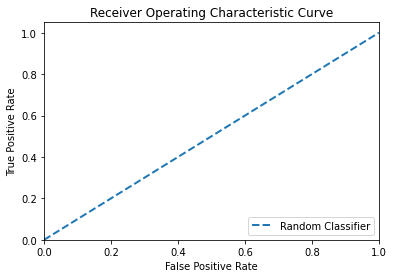

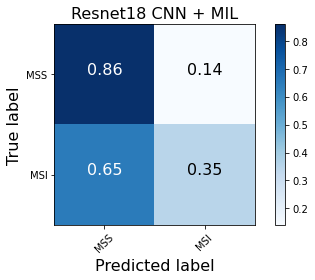

In [ ]:
model_dir = '/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/'
bs = 64
lr = 1e-4
w = 0.5
k = 5
model_info_s = [(model_dir,'MIL','resnet18',bs,lr,w,k)]

plot_results(model_info_s,if_confusion_matrix=True,plot_auroc_curve=False)

# RNN

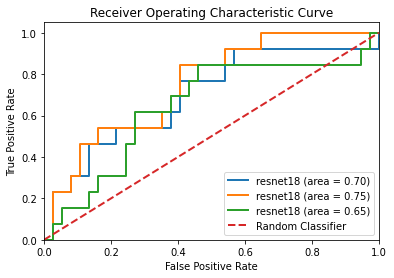

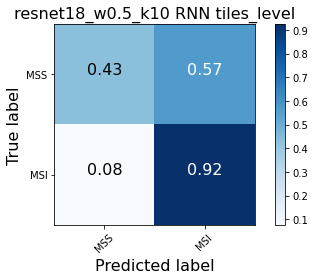

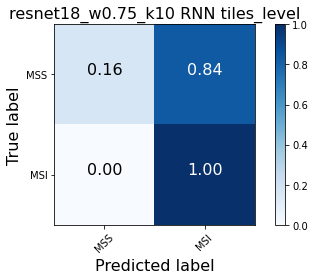

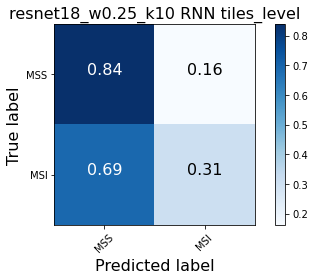

In [ ]:
model_dir = '/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/'
bs = 64
lr = 1e-4
w = 0.5
k = 10
model_info_s = [(model_dir,'RNN_tiles_level','resnet18',bs,lr,0.5,k),
                (model_dir,'RNN_tiles_level','resnet18',bs,lr,0.75,k),
                (model_dir,'RNN_tiles_level','resnet18',bs,lr,0.25,k),
                ]

plot_results(model_info_s,if_confusion_matrix=True,plot_auroc_curve=True)

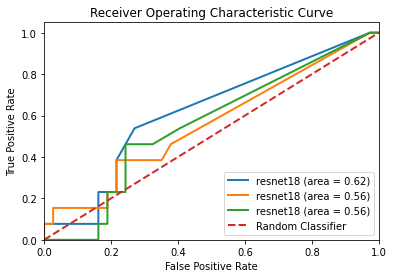

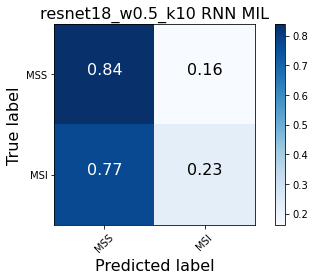

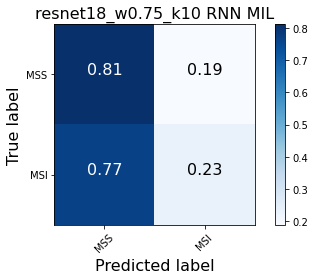

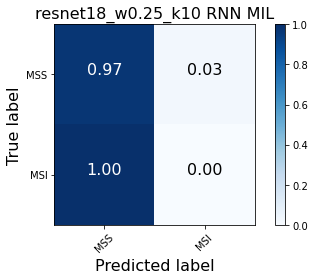

In [ ]:
model_dir = '/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/'
bs = 64
lr = 1e-4
w = 0.5
k = 10
model_info_s = [(model_dir,'RNN_MIL','resnet18',bs,lr,0.5,k),
                (model_dir,'RNN_MIL','resnet18',bs,lr,0.75,k),
                (model_dir,'RNN_MIL','resnet18',bs,lr,0.25,k),
                ]

plot_results(model_info_s,if_confusion_matrix=True,plot_auroc_curve=True)

# comparison confusion matrix

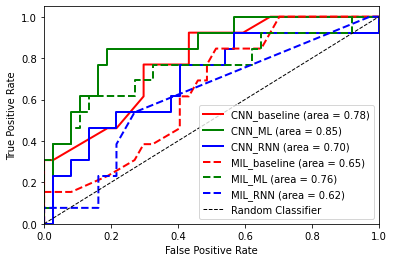

In [ ]:
fig, ax = plt.subplots()
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()

csv = '/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/RNN_tiles_level/RNN_tiles_level_resnet18_bs64_lr0.0001_w0.5_k10_output/RNN_tiles_level_resnet18_bs64_lr0.0001_w0.5_k10_output.csv'
df = pd.read_csv(csv)
y_true = list(df['target'].ravel())
prob = list(df['probability'].ravel())
fpr['CNN_RNN'], tpr['CNN_RNN'],_ = roc_curve(y_true, prob)

csv = '/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/RNN_MIL/RNN_resnet18_bs64_lr0.0001_w0.5_k10_output/RNN_resnet18_bs64_lr0.0001_w0.5_k10_output.csv'
df = pd.read_csv(csv)
y_true = list(df['target'].ravel())
prob = list(df['probability'].ravel())
fpr['MIL_RNN'], tpr['MIL_RNN'],_ = roc_curve(y_true, prob)


fpr['CNN_baseline'], tpr['CNN_baseline'] = np.load('/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/resnet18_baseline.npy')
fpr['CNN_ML'], tpr['CNN_ML'] = np.load('/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/resnet18.npy')

fpr['MIL_ML'], tpr['MIL_ML'] = np.load('/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/resnet18_MIL.npy')
fpr['MIL_baseline'], tpr['MIL_baseline'] = np.load('/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/resnet18_MIL_baseline.npy')

roc_auc['CNN_ML'] = auc(fpr['CNN_ML'], tpr['CNN_ML'])
roc_auc['CNN_baseline'] = auc(fpr['CNN_baseline'], tpr['CNN_baseline'])
roc_auc['CNN_RNN'] = auc(fpr['CNN_RNN'], tpr['CNN_RNN'])

roc_auc['MIL_ML'] = auc(fpr['MIL_ML'], tpr['MIL_ML'])
roc_auc['MIL_baseline'] = auc(fpr['MIL_baseline'], tpr['MIL_baseline'])
roc_auc['MIL_RNN'] = auc(fpr['MIL_RNN'], tpr['MIL_RNN'])


# plt.figure()
lw = 2

ax.plot(
    fpr['CNN_baseline'],
    tpr['CNN_baseline'],
    color="red",
    linestyle="-",
    lw=lw,
    label="CNN_baseline (area = %0.2f)" % roc_auc['CNN_baseline'],
)

ax.plot(
    fpr['CNN_ML'],
    tpr['CNN_ML'],
    color="green",
    linestyle="-",
    lw=lw,
    label="CNN_ML (area = %0.2f)" % roc_auc['CNN_ML'],
)

ax.plot(
    fpr['CNN_RNN'],
    tpr['CNN_RNN'],
    color="blue",
    linestyle="-",
    lw=lw,
    label="CNN_RNN (area = %0.2f)" % roc_auc['CNN_RNN'],
)

ax.plot(
    fpr['MIL_baseline'],
    tpr['MIL_baseline'],
    color="red",
    linestyle="--",
    lw=lw,
    label="MIL_baseline (area = %0.2f)" % roc_auc['MIL_baseline'],
)

ax.plot(
    fpr['MIL_ML'],
    tpr['MIL_ML'],
    color="green",
    linestyle="--",
    lw=lw,
    label="MIL_ML (area = %0.2f)" % roc_auc['MIL_ML'],
)

ax.plot(
    fpr['MIL_RNN'],
    tpr['MIL_RNN'],
    color="blue",
    linestyle="--",
    lw=lw,
    label="MIL_RNN (area = %0.2f)" % roc_auc['MIL_RNN'],
)



ax.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--", label='Random Classifier')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
# ax.set_title("Receiver operating characteristic Curve")
ax.legend(loc="lower right")
plt.show()



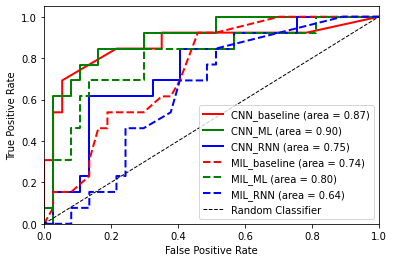

In [ ]:
fig, ax = plt.subplots()
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()

csv = '/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/RNN_tiles_level/RNN_tiles_level_densenet_bs64_lr0.0001_w0.5_k10_output/RNN_tiles_level_densenet_bs64_lr0.0001_w0.5_k10_output.csv'
df = pd.read_csv(csv)
y_true = list(df['target'].ravel())
prob = list(df['probability'].ravel())
fpr['CNN_RNN'], tpr['CNN_RNN'],_ = roc_curve(y_true, prob)

csv = '/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/RNN_MIL/RNN_densenet_bs64_lr0.0001_w0.5_k10_output/RNN_densenet_bs64_lr0.0001_w0.5_k10_output.csv'
df = pd.read_csv(csv)
y_true = list(df['target'].ravel())
prob = list(df['probability'].ravel())
fpr['MIL_RNN'], tpr['MIL_RNN'],_ = roc_curve(y_true, prob)


fpr['CNN_baseline'], tpr['CNN_baseline'] = np.load('/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/densenet_baseline.npy')
fpr['CNN_ML'], tpr['CNN_ML'] = np.load('/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/densenet.npy')

fpr['MIL_ML'], tpr['MIL_ML'] = np.load('/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/densenet_MIL.npy')
fpr['MIL_baseline'], tpr['MIL_baseline'] = np.load('/content/drive/MyDrive/Digital_Pathology/Digital_Pathology_Share_Folder/experiment_results/densenet_MIL_baseline.npy')

roc_auc['CNN_ML'] = auc(fpr['CNN_ML'], tpr['CNN_ML'])
roc_auc['CNN_baseline'] = auc(fpr['CNN_baseline'], tpr['CNN_baseline'])
roc_auc['CNN_RNN'] = auc(fpr['CNN_RNN'], tpr['CNN_RNN'])

roc_auc['MIL_ML'] = auc(fpr['MIL_ML'], tpr['MIL_ML'])
roc_auc['MIL_baseline'] = auc(fpr['MIL_baseline'], tpr['MIL_baseline'])
roc_auc['MIL_RNN'] = auc(fpr['MIL_RNN'], tpr['MIL_RNN'])


# plt.figure()
lw = 2

ax.plot(
    fpr['CNN_baseline'],
    tpr['CNN_baseline'],
    color="red",
    linestyle="-",
    lw=lw,
    label="CNN_baseline (area = %0.2f)" % roc_auc['CNN_baseline'],
)

ax.plot(
    fpr['CNN_ML'],
    tpr['CNN_ML'],
    color="green",
    linestyle="-",
    lw=lw,
    label="CNN_ML (area = %0.2f)" % roc_auc['CNN_ML'],
)

ax.plot(
    fpr['CNN_RNN'],
    tpr['CNN_RNN'],
    color="blue",
    linestyle="-",
    lw=lw,
    label="CNN_RNN (area = %0.2f)" % roc_auc['CNN_RNN'],
)

ax.plot(
    fpr['MIL_baseline'],
    tpr['MIL_baseline'],
    color="red",
    linestyle="--",
    lw=lw,
    label="MIL_baseline (area = %0.2f)" % roc_auc['MIL_baseline'],
)

ax.plot(
    fpr['MIL_ML'],
    tpr['MIL_ML'],
    color="green",
    linestyle="--",
    lw=lw,
    label="MIL_ML (area = %0.2f)" % roc_auc['MIL_ML'],
)

ax.plot(
    fpr['MIL_RNN'],
    tpr['MIL_RNN'],
    color="blue",
    linestyle="--",
    lw=lw,
    label="MIL_RNN (area = %0.2f)" % roc_auc['MIL_RNN'],
)



ax.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--", label='Random Classifier')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
# ax.set_title("Receiver operating characteristic Curve")
ax.legend(loc="lower right")
plt.show()

